In [1]:
### resdata - Jupyter Notebook analysis pipeline test
## The testing cells.
#1. Fetch single ring by id and visualise the data
#2. Fetch relevant data from full experiment and visualise as histogram
#3. Fetch relevant data from full experiment and visualise

In [2]:
## Sing in and Authentication
username = 'test_user_main'
password = 'some_password'
email = 'email@test_email.com'
full_name = 'Tomasz Neska'
path = 'http://127.0.0.1:8000/'
file_name = "test.json"
# declaration of variables used

In [3]:
# initialisation cell
import sys
sys.path.insert(0, "/home/splitsky/Desktop/code_repositories/resdata/")
import interface as ui
api = ui.API_interface(path)
api.check_connection()
#purge call - comment out if necessary -> just for development
api.purge_everything()

purged


In [4]:
# make user and populate the database with data
result = api.create_user(username_in=username, password_in=password,email=email,full_name=full_name)
print("User created "  + str(result))

# populate the database
no_of_rings = 2
no_of_experiments = 2

import testing as t
api.generate_token(username, password)
project_name = "project_test_"
experiment_name = "experiment_test"
ds_size = 2000
for i in range(0,4,1):
    t.generate_optics_project(file_name,[no_of_rings, no_of_experiments], project_name+str(i), experiment_name, author_name=username, size_of_dataset=ds_size)
    project = t.load_file_project(file_name)
    api.insert_project(project)
    
print("Database populated")
print("")
api.tree_print()
    
    
    

User created True
Database populated

The data tree:
project_test_0
     ->experiment_test 0
         -->ring_no. 0
         -->PL spectrum - ring no.0
         -->TRPL spectrum - ring no.0
         -->Lasing spectrum - ring no.0
         -->ring_no. 1
         -->PL spectrum - ring no.1
         -->TRPL spectrum - ring no.1
         -->Lasing spectrum - ring no.1
     ->experiment_test 1
         -->ring_no. 0
         -->PL spectrum - ring no.0
         -->TRPL spectrum - ring no.0
         -->Lasing spectrum - ring no.0
         -->ring_no. 1
         -->PL spectrum - ring no.1
         -->TRPL spectrum - ring no.1
         -->Lasing spectrum - ring no.1
project_test_1
     ->experiment_test 0
         -->ring_no. 0
         -->PL spectrum - ring no.0
         -->TRPL spectrum - ring no.0
         -->Lasing spectrum - ring no.0
         -->ring_no. 1
         -->PL spectrum - ring no.1
         -->TRPL spectrum - ring no.1
         -->Lasing spectrum - ring no.1
     ->experiment_te

In [5]:
# Authenticate user
api.generate_token(username, password)

In [6]:
# Tree print
api.tree_print()

The data tree:
project_test_0
     ->experiment_test 0
         -->ring_no. 0
         -->PL spectrum - ring no.0
         -->TRPL spectrum - ring no.0
         -->Lasing spectrum - ring no.0
         -->ring_no. 1
         -->PL spectrum - ring no.1
         -->TRPL spectrum - ring no.1
         -->Lasing spectrum - ring no.1
     ->experiment_test 1
         -->ring_no. 0
         -->PL spectrum - ring no.0
         -->TRPL spectrum - ring no.0
         -->Lasing spectrum - ring no.0
         -->ring_no. 1
         -->PL spectrum - ring no.1
         -->TRPL spectrum - ring no.1
         -->Lasing spectrum - ring no.1
project_test_1
     ->experiment_test 0
         -->ring_no. 0
         -->PL spectrum - ring no.0
         -->TRPL spectrum - ring no.0
         -->Lasing spectrum - ring no.0
         -->ring_no. 1
         -->PL spectrum - ring no.1
         -->TRPL spectrum - ring no.1
         -->Lasing spectrum - ring no.1
     ->experiment_test 1
         -->ring_no. 0
         -

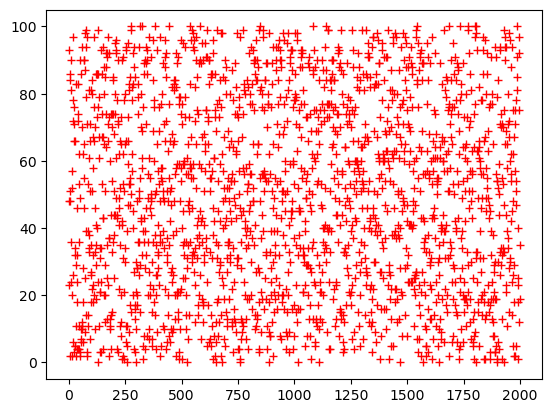

In [7]:
# Pull individual data set by name

dataset = api.return_full_dataset("project_test_3","experiment_test 0", "PL spectrum - ring no.0")
x, y, ey = dataset.data
### plot etc...

import matplotlib.pyplot as plt

plt.plot(x,y,"r+")


The data tree:
project_test_0
     ->experiment_test 0
         -->ring_no. 0
         -->PL spectrum - ring no.0
         -->TRPL spectrum - ring no.0
         -->Lasing spectrum - ring no.0
         -->ring_no. 1
         -->PL spectrum - ring no.1
         -->TRPL spectrum - ring no.1
         -->Lasing spectrum - ring no.1
     ->experiment_test 1
         -->ring_no. 0
         -->PL spectrum - ring no.0
         -->TRPL spectrum - ring no.0
         -->Lasing spectrum - ring no.0
         -->ring_no. 1
         -->PL spectrum - ring no.1
         -->TRPL spectrum - ring no.1
         -->Lasing spectrum - ring no.1
project_test_1
     ->experiment_test 0
         -->ring_no. 0
         -->PL spectrum - ring no.0
         -->TRPL spectrum - ring no.0
         -->Lasing spectrum - ring no.0
         -->ring_no. 1
         -->PL spectrum - ring no.1
         -->TRPL spectrum - ring no.1
         -->Lasing spectrum - ring no.1
     ->experiment_test 1
         -->ring_no. 0
         -

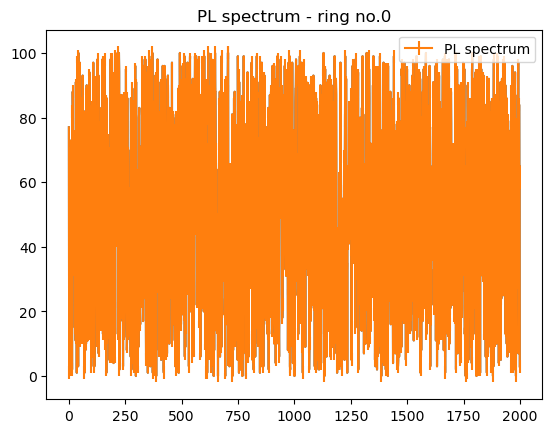

Printing 2D spectrum with error bars


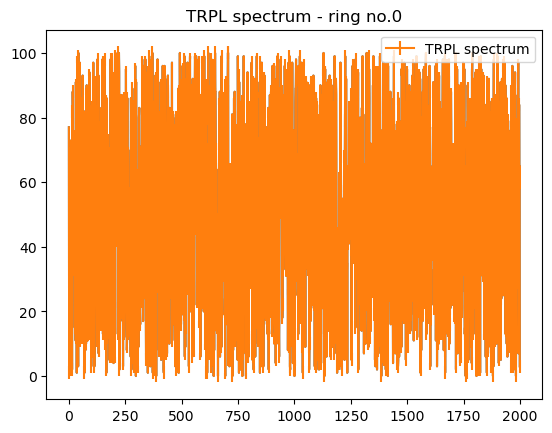

Printing 2D spectrum with error bars


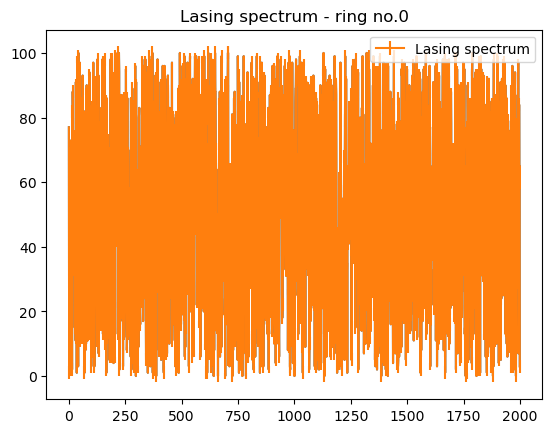

In [8]:
# Pull single ring -> plot dimensions and all spectra
import sys
sys.path.insert(0, "/home/splitsky/Desktop/code_repositories/resdata/")
import interface as ui
import jupyter_driver as dr

api = ui.API_interface(path)
api.check_connection()

api.generate_token(username, password)

api.tree_print()
ring_id = 0
experiment_id = "experiment_test 1"
project_id = "project_test_0"
projects = api.experiment_search_meta(meta_search={"ring_id": ring_id}, experiment_id=experiment_id, project_id=project_id)

for entry in projects:
    print(entry.name)
    
    
for entry in projects:
    dr.plot_from_dataset(entry, entry.data_type, entry.name)
    

In [9]:
# Pull all rings from experiment and summarise dimensions
import jupyter_driver as dr
# pull full experiment
experiment = api.return_full_experiment(project_name="project_test_0" ,experiment_name="experiment_test 0")
# separate dimensions
datasets = experiment.children
desired_data = []
for ds in datasets:
    if ds.data_type == "dimensions":
        desired_data.append(ds)
        
# summarise the quantities
dr.summarise_dimensions(desired_data)

#TODO: finish this up once matplot lib works

Average values for dimensions: 
ring diameter : 0.10761140936071661 +/- 0.05977209720862159
quality : 4.5 +/- 2.5
pitch : 0.7279055260508358 +/- 0.08047259709123067
threshold : 0.8123002489080273 +/- 0.15903655960787133


In [10]:
# Create a group and pull it together to summarise ring dimensions

#TODO: to implement as group functions still don't fully work

In [11]:
# Pull group together to summarise spectra 

# same as above